### Practical Notebook


In [42]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

In [113]:
# Load train data
X_amp_train = np.load("Xtrain_amp.npy")
y_amp_train = np.load("ytrain_amp.npy")

In [4]:
# Load test data
X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")

In [5]:
# Load train data
X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")

In [125]:
# Load test data
X_mel_test = np.load("Xtest_mel.npy")
y_mel_test = np.load("ytest_mel.npy")

In [126]:
# Flatten spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)

### Part A: Feature Engineering, Baseline Models

#### Raw amplitude features

Here we apply PCA to our raw amplitude features in order to extract the 500 most significant components.

In [114]:
pca = PCA(n_components=500)

# standardize data
stand_X_amp_train = (X_amp_train - np.mean(X_amp_train)) / np.std(X_amp_train)
stand_X_amp_test = (X_amp_test - np.mean(X_amp_test)) / np.std(X_amp_test)

# create our PCA object that will calculate the first 500 components.
X_amp_train_reduced = pca.fit_transform(stand_X_amp_train)
X_amp_test_reduced = pca.fit_transform(stand_X_amp_test)

# save reduced data as pickle
with open("X_amp_train_reduced.pickle", "wb") as file:
    pickle.dump(X_amp_train_reduced, file)
with open("X_amp_test_reduced.pickle", "wb") as file:
    pickle.dump(X_amp_test_reduced, file)

Once our data set is reduced in dimension, we use it to train a logistic regression classifier.

In [115]:
# load reduced data from pickle
with open('X_amp_train_reduced.pickle', "rb") as file:
    X_amp_train_reduced = pickle.load(file)
with open('X_amp_test_reduced.pickle', "rb") as file:
    X_amp_test_reduced = pickle.load(file)

In [116]:
# create logistic regression classifier
amp_lr_model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=1000)

# fit classifier
amp_lr_model.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_lr_model.pickle", "wb") as file:
    pickle.dump(amp_lr_model, file)

With our trained classifier, we make predictions and calculate the over all and per-class accuracies.

In [117]:
# load classifier from pickle
with open('amp_lr_model.pickle', "rb") as file:
    amp_lr_model = pickle.load(file)

Mean Accuracy:  0.144
Per-class Accuracies: [0.12  0.128 0.465 0.035 0.064 0.095 0.    0.076 0.119 0.133]


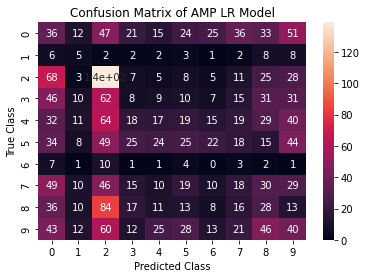

In [140]:
# make predictions
y_amp_preds = amp_lr_model.predict(X_amp_test_reduced)

# calculate accuracy and balanced accuracy
print("Mean Accuracy: ", round(accuracy_score(y_amp_preds, y_amp_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_amp_test, y_amp_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of AMP LR Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### Mel amplitude features

Here we do the same procedure for our Mel spectogram features

In [127]:
# standardize data
stand_X_mel_train_flat = (X_mel_train_flat - np.mean(X_mel_train_flat)) / np.std(X_mel_train_flat)
stand_X_mel_test_flat = (X_mel_test_flat - np.mean(X_mel_test_flat)) / np.std(X_mel_test_flat)

# create our PCA object that will calculate the first 500 components.
X_mel_train_reduced = pca.fit_transform(stand_X_mel_train_flat)
X_mel_test_reduced = pca.fit_transform(stand_X_mel_test_flat)

# save reduced data as pickle
with open("X_mel_train_reduced.pickle", "wb") as file:
    pickle.dump(X_mel_train_reduced, file)
with open("X_mel_test_reduced.pickle", "wb") as file:
    pickle.dump(X_mel_test_reduced, file)

In [128]:
# load reduced data from pickle
with open('X_mel_train_reduced.pickle', "rb") as file:
    X_mel_train_reduced = pickle.load(file)
with open('X_mel_test_reduced.pickle', "rb") as file:
    X_mel_test_reduced = pickle.load(file)

In [133]:
# create logistic regression classifier
mel_lr_model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=3000)

# fit classifier
mel_lr_model.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_lr_model.pickle", "wb") as file:
    pickle.dump(mel_lr_model, file)

In [134]:
# load classifier from pickle
with open('mel_lr_model.pickle', "rb") as file:
    mel_lr_model = pickle.load(file)

Mean Accuracy:  0.152
Per-class Accuracies: [0.03  0.179 0.05  0.083 0.027 0.121 0.    0.275 0.186 0.453]


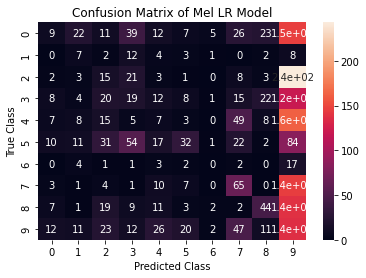

In [141]:
# make predictions
y_mel_preds = mel_lr_model.predict(X_mel_test_reduced)

# calculate accuracy and balanced accuracy
print("Mean Accuracy: ", round(accuracy_score(y_mel_preds, y_mel_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_mel_test, y_mel_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Mel LR Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Part B: More Modeling

#### B1: First Step
Here we 

#### B2: More Complicated Models–Hyperparameter Tuning and Validation